In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np

# Analyzing Results in the Context of GA Expression Sets

Through GeneAnalytics we have 9 tissue sets we can use for validation comparisons of our gene sets gathered from various experiments

In [63]:
def return_genes(ga_name, exp_name):
    primary = exp_set[ga_name]
    pw_genes = list(pwise[exp_name].index)
    tvn_genes = list(tvn[exp_name].index)
    match_genes = list(matched[exp_name].index)
    return primary, pw_genes, tvn_genes, match_genes

def barplot_methods(ga_name, exp_name):
    primary, p, t, m = return_genes(ga_name, exp_name)
    vals = [len(primary.intersection(set(x[:n]))) for x in [p, t, m]]
    sns.barplot(['Pwise', 'TvN', 'Matched'], vals)
    plt.title('Total Genes: ' + str(len(primary)))
    print vals

In [64]:
exp_tsvs = [x for x in os.listdir('.') if x.endswith('.tsv')]
exp = {}
exp_set = {}
for tsv in exp_tsvs:
    exp[tsv[:-4]] = pd.read_csv(tsv, sep='\t')
    exp_set[tsv[:-4]] = set(exp[tsv[:-4]].Gene)

In [65]:
pwise = {}
tissues = set([x.split('-')[0] for x in os.listdir('../pairwise-tcga/results/')])
for result in tissues:
    pwise[result] = pd.read_csv('../pairwise-tcga/results/' + result + '-results.tsv', index_col=0, sep='\t')
    pwise[result]['pval_count_percentage'] = pwise[result]['pval_counts'] / pwise[result]['num_samples']
    
result_paths = [x for x in os.listdir('../tcga-tumor-vs-normal/results') if '.tsv' in x]
tvn = {}
for result in result_paths:
    tvn[result.split('-')[0]] = pd.read_csv(os.path.join('../tcga-tumor-vs-normal/results', result), index_col=0, sep='\t')

result_paths = [x for x in os.listdir('../tcga-matched/results') if '.tsv' in x]
matched = {}
for result in result_paths:
    matched[result.split('-')[0]] = pd.read_csv(os.path.join('../tcga-matched/results', result), index_col=0, sep='\t')

For what tissues do we have expression sets for?

In [66]:
print '\n'.join(sorted(exp.keys()))

Breast_Cancer
Cervical_Cancer
Colorectal_Cancer
Head_and_Neck_Squamous
Hepatocellular_Cancer
Lung_Cancer
Pancreatic_Cancer
Prostate_Cancer
Renal_Cell_Carcinoma


In [67]:
df = pd.DataFrame()
tissues, counts, types = [], [], []

### Breast

In [68]:
n = 100

[10, 9, 15]


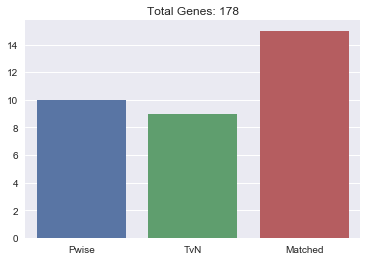

In [69]:
barplot_methods('Breast_Cancer', 'breast')
counts.extend([10, 9, 15])
tissues.extend( ['Breast'] * 3)

## Cerivcal Cancer

[5, 10, 7]


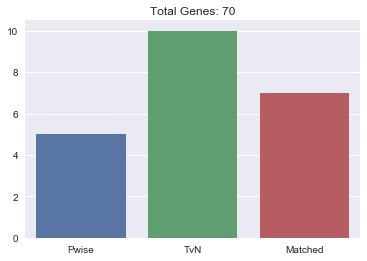

In [70]:
barplot_methods('Cervical_Cancer', 'cervix')
counts.extend([5, 10, 7])
tissues.extend(['Cervix'] * 3)

## Colorectal_Cancer

[11, 8, 12]


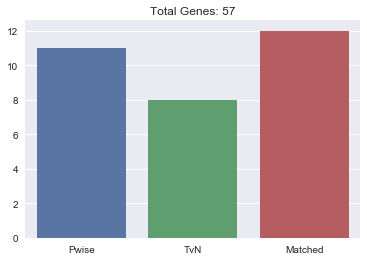

In [71]:
barplot_methods('Colorectal_Cancer', 'colon')
counts.extend([11, 8, 12])
tissues.extend(['Colon']*3)

## Hepatocellular_Cancer

[1, 0, 0]


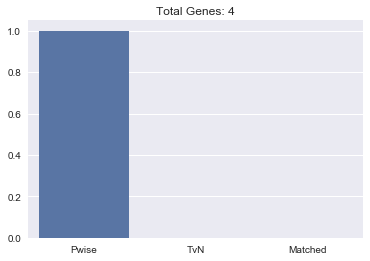

In [72]:
barplot_methods('Hepatocellular_Cancer', 'liver')
counts.extend([1, 0, 0])
tissues.extend(['Liver']*3)

## Lung_Cancer

[31, 29, 26]


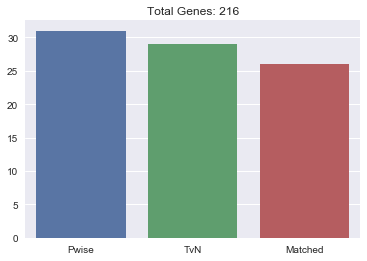

In [73]:
barplot_methods('Lung_Cancer', 'lung_adenocarcinoma')
counts.extend([31, 29, 26])
tissues.extend(['Lung_adeno']*3)

[42, 39, 38]


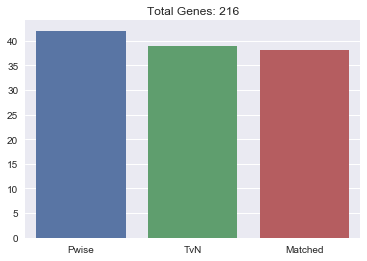

In [74]:
barplot_methods('Lung_Cancer', 'lung_squamous')
counts.extend([42, 39, 38])
tissues.extend(['Lung_squamous']*3)

## Pancreatic_Cancer

[6, 4, 4]


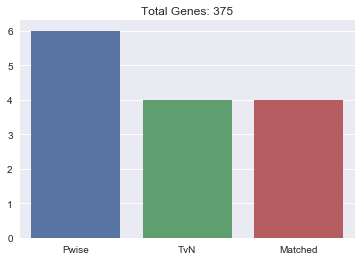

In [75]:
barplot_methods('Pancreatic_Cancer', 'pancreas')
counts.extend([6, 4, 4])
tissues.extend(['Pancreas']*3)

## Prostate_Cancer

[3, 4, 2]


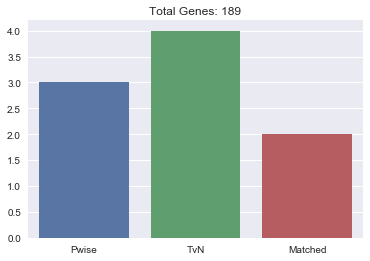

In [76]:
barplot_methods('Prostate_Cancer', 'prostate')
counts.extend([3, 4, 2])
tissues.extend(['Prostate']*3)

### Renal_Cell_Carcinoma

[61, 45, 65]


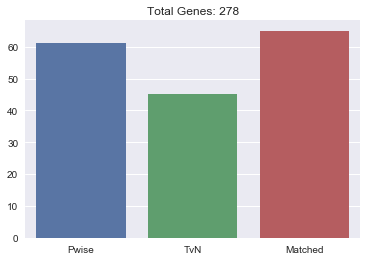

In [77]:
barplot_methods('Renal_Cell_Carcinoma', 'kidney')
counts.extend([61, 45, 65])
tissues.extend(['Kidney']*3)

In [79]:
types = ['Pwise', 'TvN', 'Matched'] * 9

In [87]:
df['Counts'] = counts
df['Tissues'] = tissues
df['Method'] = types

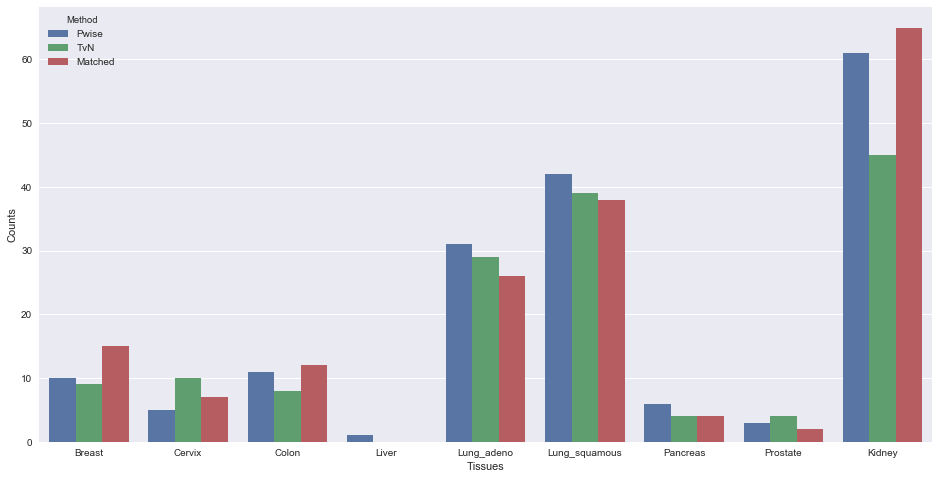

In [91]:
f, ax = plt.subplots(figsize=(16, 8))
sns.barplot('Tissues', 'Counts', hue='Method', data=df, ax=ax)
ax.set_ylabel('Counts')

## DESeq2 Runtime

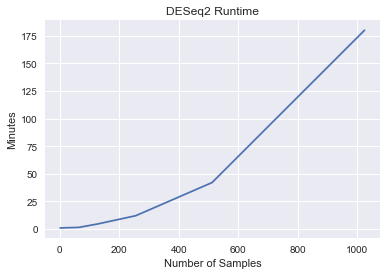

In [95]:
samples = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
times = [55.0/60, 55.0/60, 55.0/60, 1 + 2.0/60, 1 + 8.0/60, 1 + 22.0/60, 4.5, 12, 42, 3*60]

plt.plot(samples, times)
plt.xlabel('Number of Samples')
plt.ylabel('Minutes')
plt.title('DESeq2 Runtime')